In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df_eda = df.copy()
print(df.info()) 
df.describe()

y = df['price_class'].values
df.drop(columns=['price_class'], inplace=True)
X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(df, y, test_size=0.2, random_state=42)

<class 'pandas.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  str    
 1   room_type            40737 non-null  str    
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), str(2)
memory usage: 2.2 MB
None


In [3]:
print(df_eda.isnull().sum()) 
print(df_eda.isna().mean().sort_values(ascending=False))

missing_rows = df_eda.isna().any(axis=1).sum() / len(df_eda) * 100
print(f'% of rows with missing values: {missing_rows}')    

neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
price_class               0
dtype: int64
minimum_nights         0.031973
number_of_reviews      0.027160
amenity_score          0.022153
neighbourhood_group    0.020291
room_type              0.014777
availability_365       0.014390
price_class            0.000000
dtype: float64
% of rows with missing values: 12.368191931895133


In [4]:
print(df_eda.describe(include='all'))
print(df_eda['neighbourhood_group'].value_counts(normalize=True))
print(df_eda['room_type'].value_counts(normalize=True))
print(df_eda['price_class'].value_counts(normalize=True))

df_no_nan = df_eda.copy()
df_clean = df_no_nan.dropna()
print('----------------------------------------------')
print(df_clean.describe(include='all'))
print(df_clean['neighbourhood_group'].value_counts(normalize=True))
print(df_clean['room_type'].value_counts(normalize=True))
print(df_clean['price_class'].value_counts(normalize=True))

       neighbourhood_group        room_type  minimum_nights  amenity_score  \
count                40509            40737    40026.000000   40432.000000   
unique                   5                3             NaN            NaN   
top              Manhattan  Entire home/apt             NaN            NaN   
freq                 17905            21099             NaN            NaN   
mean                   NaN              NaN        7.002873      51.987233   
std                    NaN              NaN       19.725353      19.459480   
min                    NaN              NaN        1.000000      10.000000   
25%                    NaN              NaN        1.000000      36.800000   
50%                    NaN              NaN        3.000000      51.400000   
75%                    NaN              NaN        5.000000      66.100000   
max                    NaN              NaN     1000.000000      99.000000   

        number_of_reviews  availability_365   price_class  
cou

In [5]:
print(df_eda['neighbourhood_group'].unique())   
print(df_eda['room_type'].unique())
print(df_eda['price_class'].value_counts())

<StringArray>
['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island', nan]
Length: 6, dtype: str
<StringArray>
[nan, 'Private room', 'Entire home/apt', 'Shared room']
Length: 4, dtype: str
price_class
1    23287
2     9844
0     5567
3     2650
Name: count, dtype: int64


In [6]:
numerecail_features = ['minimum_nights', 'number_of_reviews', 'amenity_score', 'availability_365']
df_eda.dropna(subset=numerecail_features, inplace=True)


In [7]:
print(f'minimum_nights skewness score: {df_eda["minimum_nights"].skew()}')
print(f'amenity_score skewness score: {df_eda["amenity_score"].skew()}')
print(f'number_of_reviews skewness score: {df_eda["number_of_reviews"].skew()}')
print(f'availability_365 skewness score: {df_eda["availability_365"].skew()}')

minimum_nights skewness score: 22.023349105216163
amenity_score skewness score: 0.08471059713583032
number_of_reviews skewness score: 3.560439006219251
availability_365 skewness score: 0.7403386019088196


In [8]:
def plot_feature_distribution(feature_name):
    feature_mean = df_eda[feature_name].mean()
    feature_median = df_eda[feature_name].median()
    feature_mode = df_eda[feature_name].mode()[0]
    plt.figure(figsize=(5,5))
    sns.displot(df_eda[feature_name], color='skyblue', bins=50, kde=True)
    plt.axvline(feature_mean, color='red', linestyle='--', label=f'Mean: {feature_mean:.2f}')
    plt.axvline(feature_median, color='green', linestyle='--', label=f'Median: {feature_median:.2f}')
    plt.axvline(feature_mode, color='blue', linestyle='--', label=f'Mode: {feature_mode:.2f}')
    plt.legend()
    plt.show()

<Figure size 500x500 with 0 Axes>

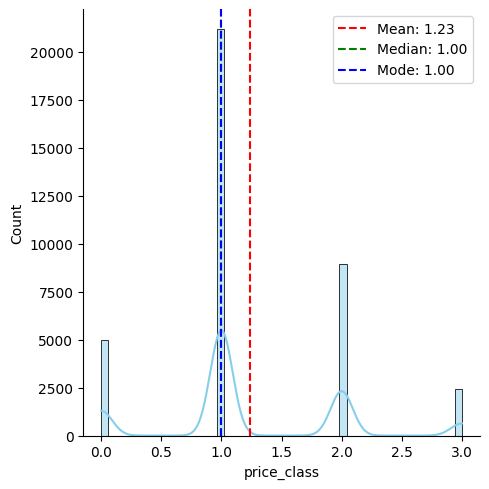

<Figure size 500x500 with 0 Axes>

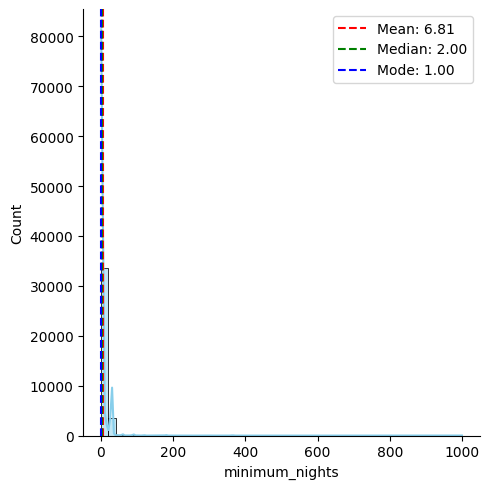

<Figure size 500x500 with 0 Axes>

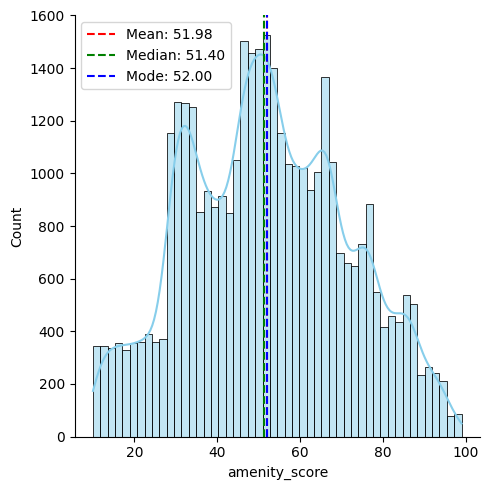

<Figure size 500x500 with 0 Axes>

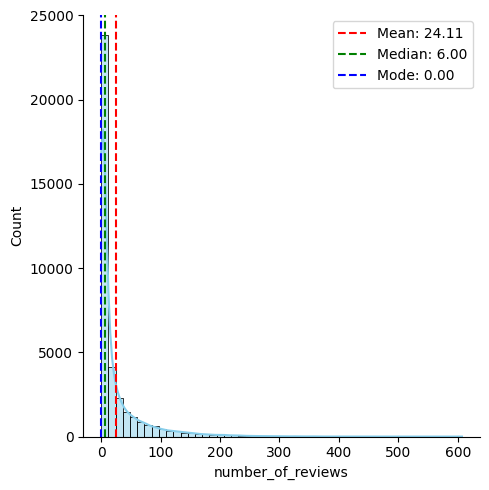

<Figure size 500x500 with 0 Axes>

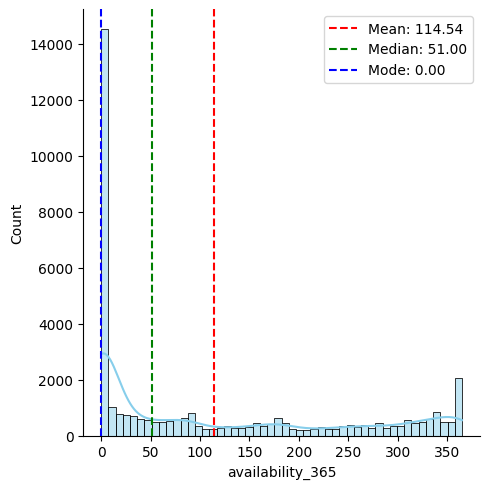

In [9]:

plot_feature_distribution('price_class')
plot_feature_distribution('minimum_nights')

plot_feature_distribution('amenity_score')

plot_feature_distribution('number_of_reviews')

plot_feature_distribution('availability_365')

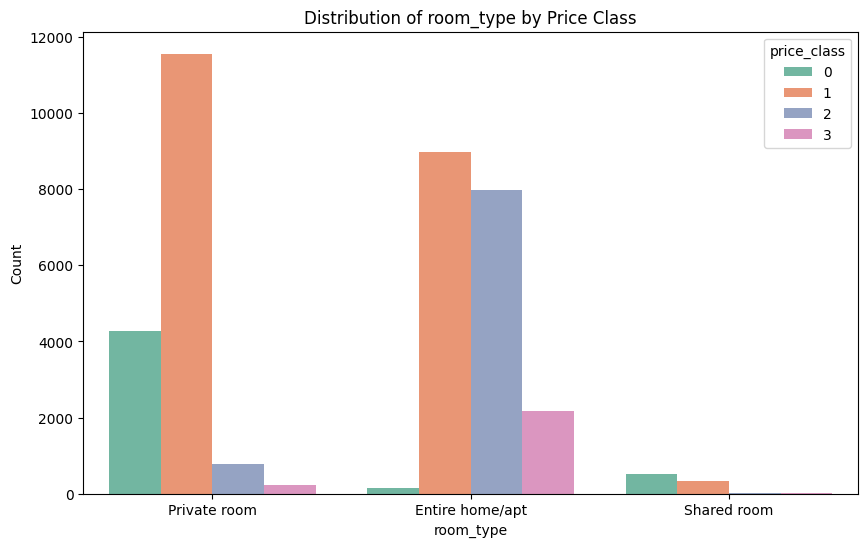

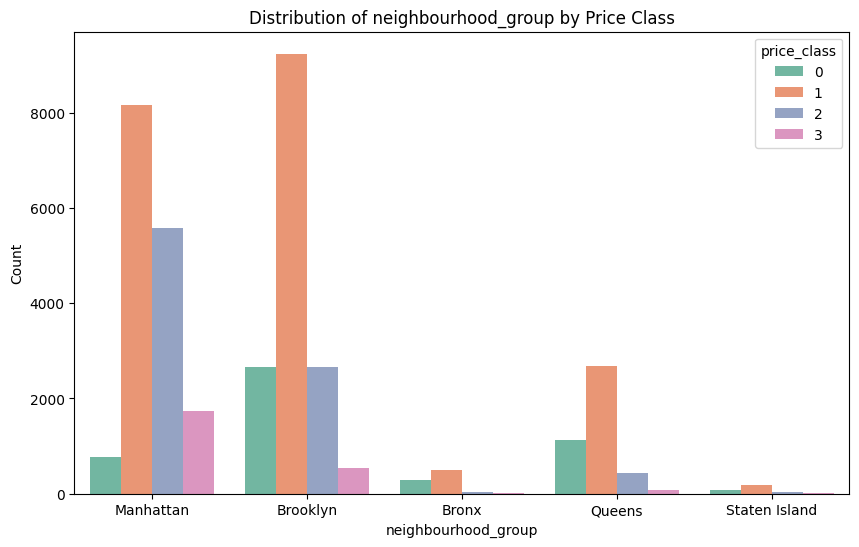

In [10]:
def plot_distribution_by_feature(feature):
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature, hue='price_class', data=df_eda, palette='Set2')
    plt.title(f'Distribution of {feature} by Price Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

plot_distribution_by_feature('room_type')
plot_distribution_by_feature('neighbourhood_group')

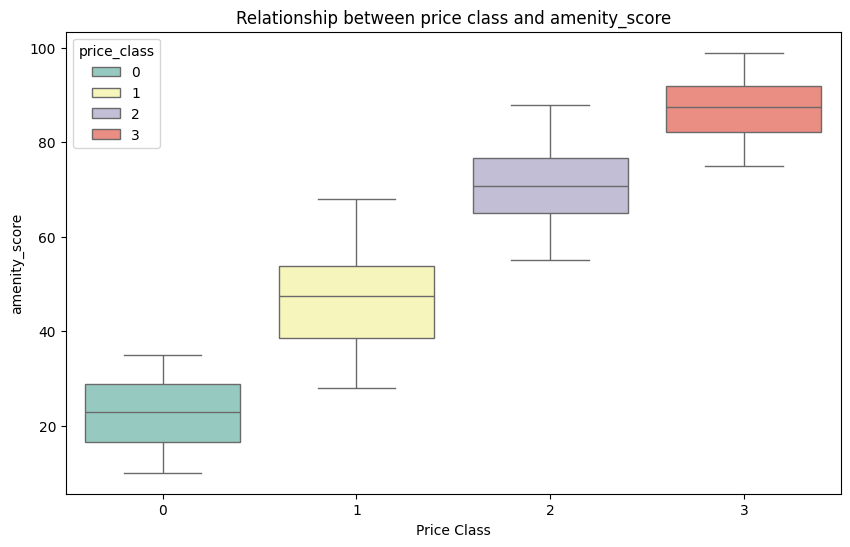

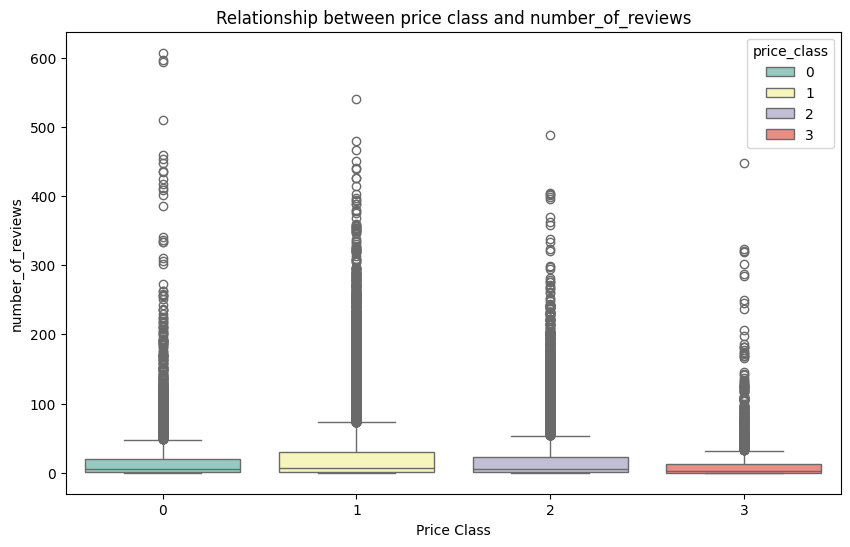

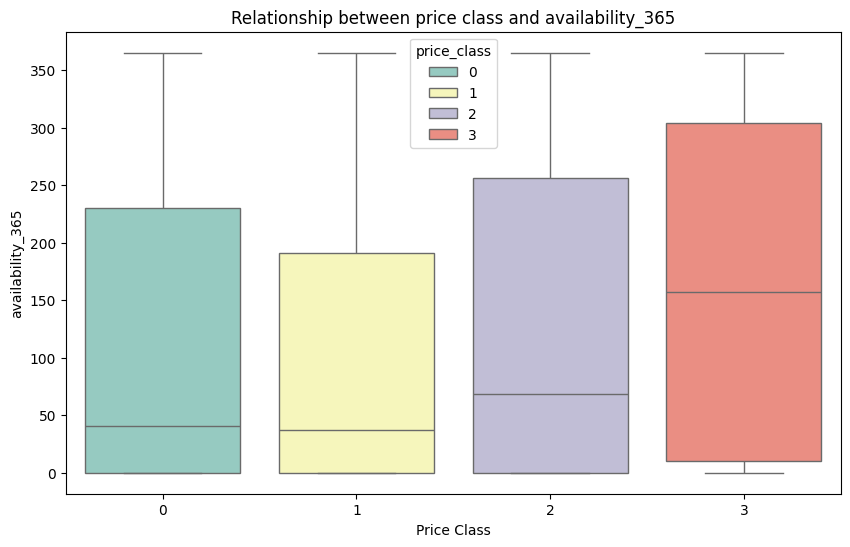

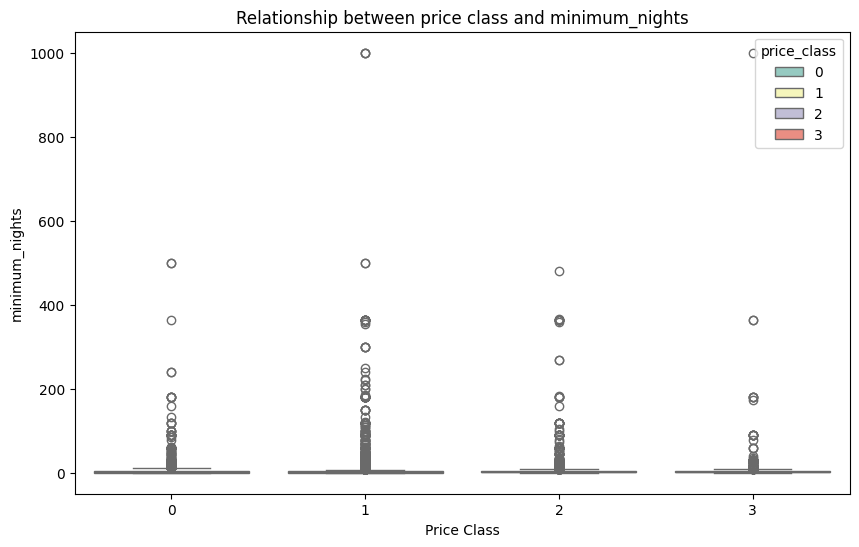

In [11]:
def numerical_feature_distribution(feature):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='price_class' , y=feature, data=df_eda, hue='price_class', palette='Set3')
    plt.title(f'Relationship between price class and {feature}')
    plt.xlabel('Price Class')
    plt.ylabel(feature)
    plt.show()

numerical_feature_distribution('amenity_score')
numerical_feature_distribution('number_of_reviews')
numerical_feature_distribution('availability_365')
numerical_feature_distribution('minimum_nights')

correlation marix:
                   minimum_nights  number_of_reviews  amenity_score  \
minimum_nights           1.000000          -0.084380       0.020572   
number_of_reviews       -0.084380           1.000000      -0.031684   
amenity_score            0.020572          -0.031684       1.000000   
availability_365         0.137195           0.170456       0.078012   
price_class              0.014881          -0.034930       0.875188   

                   availability_365  price_class  
minimum_nights             0.137195     0.014881  
number_of_reviews          0.170456    -0.034930  
amenity_score              0.078012     0.875188  
availability_365           1.000000     0.092554  
price_class                0.092554     1.000000  


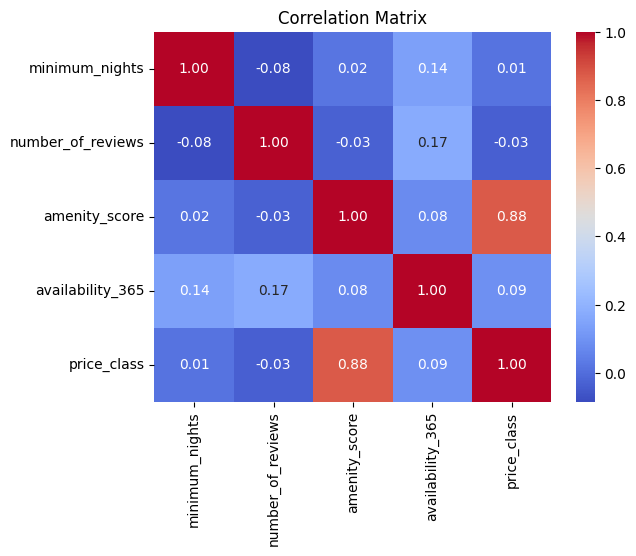

In [12]:
print("correlation marix:")
numerice_features = ['minimum_nights', 'number_of_reviews', 'amenity_score', 'availability_365', 'price_class']
correlation_matrix = df_eda[numerice_features].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

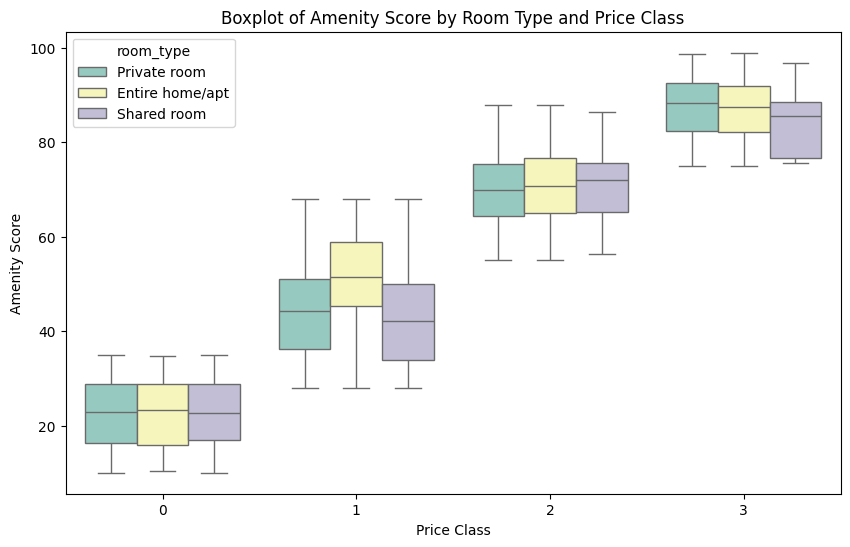

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='price_class', y='amenity_score', data=df_eda, hue='room_type', palette='Set3')

plt.title('Boxplot of Amenity Score by Room Type and Price Class')
plt.xlabel('Price Class')
plt.ylabel('Amenity Score')
plt.show()

In [14]:
categorical_col_pipeline = Pipeline(steps=[
    ('mode_impute', SimpleImputer(strategy='most_frequent', add_indicator=True)),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


log_numerical_col_pipeline = Pipeline(steps=[
    ('median_impute', SimpleImputer(strategy='median', add_indicator=True)),
    ('log_transform', FunctionTransformer(func=np.log1p,)),
    ('scaler', StandardScaler())])

ss_col_pipeline = Pipeline(steps=[
    ('median_impute', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])
    
    

In [15]:
categorical_features = ['neighbourhood_group', 'room_type']
log_numerical_features = ['minimum_nights', 'number_of_reviews']
ss_features = ['amenity_score', 'availability_365']

feature_processing = ColumnTransformer(transformers=[
    ('categorical_col_pipeline', categorical_col_pipeline, categorical_features),
    ('log_numerical_col_pipeline', log_numerical_col_pipeline, log_numerical_features),
    ('ss_col_pipeline', ss_col_pipeline, ss_features)
], remainder='passthrough').set_output(transform='pandas')

if (df[log_numerical_features] <= 0).any().any():
    print("!!!!!! -ve values in log featires)")
    df[log_numerical_features] = df[log_numerical_features].clip(lower=0)
    

X_train = feature_processing.fit_transform(X_train_raw)
X_val = feature_processing.transform(X_val_raw)


print(X_train.shape)
print(X_train.columns)
# print(X_train.head(1))
print(X_val.shape)
# print(X_val.head(1))


!!!!!! -ve values in log featires)
(33078, 20)
Index(['categorical_col_pipeline__neighbourhood_group_Bronx',
       'categorical_col_pipeline__neighbourhood_group_Brooklyn',
       'categorical_col_pipeline__neighbourhood_group_Manhattan',
       'categorical_col_pipeline__neighbourhood_group_Queens',
       'categorical_col_pipeline__neighbourhood_group_Staten Island',
       'categorical_col_pipeline__room_type_Entire home/apt',
       'categorical_col_pipeline__room_type_Private room',
       'categorical_col_pipeline__room_type_Shared room',
       'categorical_col_pipeline__missingindicator_neighbourhood_group_False',
       'categorical_col_pipeline__missingindicator_neighbourhood_group_True',
       'categorical_col_pipeline__missingindicator_room_type_False',
       'categorical_col_pipeline__missingindicator_room_type_True',
       'log_numerical_col_pipeline__minimum_nights',
       'log_numerical_col_pipeline__number_of_reviews',
       'log_numerical_col_pipeline__missingin

In [16]:
print(type(X_train))
print(type(X_val))


<class 'pandas.DataFrame'>
<class 'pandas.DataFrame'>


In [17]:
# verify all data is processed and there are no missing values
if X_train.isnull().sum().sum() == 0:
    print("All data is processed and there are no missing values.")

if X_val.isnull().sum().sum() == 0:
    print("All data is processed and there are no missing values in validation set.")
    
if X_train.isin([np.inf, -np.inf]).sum().sum() == 0:
    print("All data is processed and there are no infinite values in training set.")
    
if X_val.isin([np.inf, -np.inf]).sum().sum() == 0:
    print("All data is processed and there are no infinite values in validation set.")

print(f'must be zero: {X_train.isnull().sum().sum()}')
print(f'X_val isna mean: {X_val.isna().mean().sort_values(ascending=False)}')
print(f'Must be zero: {X_train.isin([np.inf, -np.inf]).sum().sum()}')

for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']:
        print(f'{col} skewness score: {X_train[col].skew()}')
        
for col in X_train.columns:
    if 'neighbourhood' in col or 'room_type' in col:
        print(f'{col} unique values: {X_train[col].unique()}')
        
print(X_train.describe(include='all'))

All data is processed and there are no missing values.
All data is processed and there are no missing values in validation set.
All data is processed and there are no infinite values in training set.
All data is processed and there are no infinite values in validation set.
must be zero: 0
X_val isna mean: categorical_col_pipeline__neighbourhood_group_Bronx                     0.0
categorical_col_pipeline__neighbourhood_group_Brooklyn                  0.0
categorical_col_pipeline__neighbourhood_group_Manhattan                 0.0
categorical_col_pipeline__neighbourhood_group_Queens                    0.0
categorical_col_pipeline__neighbourhood_group_Staten Island             0.0
categorical_col_pipeline__room_type_Entire home/apt                     0.0
categorical_col_pipeline__room_type_Private room                        0.0
categorical_col_pipeline__room_type_Shared room                         0.0
categorical_col_pipeline__missingindicator_neighbourhood_group_False    0.0
categoric

In [18]:
y_train_raw = y_train_raw.reshape(-1, 1)
y_val_raw = y_val_raw.reshape(-1, 1)
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train = one_hot_encoder.fit_transform(y_train_raw)
y_val = one_hot_encoder.transform(y_val_raw)
print(y_train.shape)
print(y_val.shape   )

(33078, 4)
(8270, 4)


In [19]:
# y_train = y_train_raw.values.flatten()
# y_val = y_val_raw.values.flatten()

In [20]:

from neural_network import NeuralNetwork
from activation_functions import Sigmoid, Relu, Softmax
from optimizers import GradientDescent
from loss_functions import CrossEntropyLoss
from initializers import WeightInitializer

L1_NEURONS = 32
L2_NEURONS = 16
OUTPUT_NEURONS = 4
LOSS_FUNCTION = 'cross_entropy'
LEARNING_RATE_SIGMOID = 0.1
LEARNING_RATE_RELU = 0.05


In [21]:

optimizer_nn_sigmoid = GradientDescent(learning_rate=LEARNING_RATE_SIGMOID)
optimizer_nn_relu = GradientDescent(learning_rate=LEARNING_RATE_RELU)

cross_entropy_loss = CrossEntropyLoss()

print(f'activation functions: Sigmoid')

nn_with_sigmoid = NeuralNetwork(input_dimension=X_train.shape[1], 
                              loss_function=cross_entropy_loss, 
                              optimizer=optimizer_nn_sigmoid, 
                              weight_initializer=WeightInitializer.xavier_glorot)

nn_with_sigmoid.add_layer(num_of_neurons=L1_NEURONS, activation_function=Sigmoid())
nn_with_sigmoid.add_layer(num_of_neurons=L2_NEURONS, activation_function=Sigmoid())
nn_with_sigmoid.add_layer(num_of_neurons=OUTPUT_NEURONS, activation_function=Softmax())


print(f'activation functions: ReLU')

nn_with_relu = NeuralNetwork(input_dimension=X_train.shape[1], 
                              loss_function=cross_entropy_loss, 
                              optimizer=optimizer_nn_relu, 
                              weight_initializer=WeightInitializer.he_kaiming)

nn_with_relu.add_layer(num_of_neurons=L1_NEURONS, activation_function=Relu())
nn_with_relu.add_layer(num_of_neurons=L2_NEURONS, activation_function=Relu())
nn_with_relu.add_layer(num_of_neurons=OUTPUT_NEURONS, activation_function=Softmax())


activation functions: Sigmoid
Initializing Softmax activation function.
activation functions: ReLU
Initializing Softmax activation function.


In [ ]:
ITERATIONS = 200

loss_function = CrossEntropyLoss()
sigmoid_acc_stats ={'train_acc':[], 'val_acc':[]}
sigmoid_loss_stats={'train_loss':[], 'val_loss':[]}
relu_acc_stats = {'train_acc':[], 'val_acc':[]}
relu_loss_stats = {'train_loss':[], 'val_loss':[]}

sigmoid_hl_grads = {'L1':[], 'L2':[]}
relu_hl_grads = {'L1':[], 'L2':[]}

print('Training Neural Network 1 with Sigmoid activation function...')
for i in range(ITERATIONS):
    y_hat_train = nn_with_sigmoid.forward(X_train.values)
    train_loss = loss_function.compute_loss(y_train, y_hat_train)
    nn_with_sigmoid.backward(y_hat_train, y_train)
    
    # sigmoid based netwrok hidden layers mean gradient collection
    l1_s_mean_grad_mag = np.mean(np.abs(nn_with_sigmoid.layers[0].d_w))
    l2_s_mean_grad_mag = np.mean(np.abs(nn_with_sigmoid.layers[1].d_w))
    sigmoid_hl_grads['L1'].append(l1_s_mean_grad_mag)
    sigmoid_hl_grads['L2'].append(l2_s_mean_grad_mag)
    
    
    nn_with_sigmoid.optimize()
    
    # trainig / accuray stats collection
    sigmoid_loss_stats['train_loss'].append(train_loss)
    sigmoid_acc_stats['train_acc'].append(nn_with_sigmoid.evaluate(X_train.values, y_train))
    sigmoid_acc_stats['val_acc'].append(nn_with_sigmoid.evaluate(X_val.values, y_val))
    
    y_hat_val = nn_with_sigmoid.forward(X_val.values)
    val_loss = loss_function.compute_loss(y_val, y_hat_val)
    sigmoid_loss_stats['val_loss'].append(val_loss)
    
print('Training Neural Network 2 with ReLU activation function...')
for i in range(ITERATIONS):
    y_hat_train = nn_with_relu.forward(X_train.values)
    train_loss = loss_function.compute_loss(y_train, y_hat_train)
    nn_with_relu.backward(y_hat_train, y_train)
    
    # reul based netwrok hidden layers mean gradient collection
    l1_r_mean_grad_mag = np.mean(np.abs(nn_with_relu.layers[0].d_w))
    l2_r_mean_grad_mag = np.mean(np.abs(nn_with_relu.layers[1].d_w))
    relu_hl_grads['L1'].append(l1_r_mean_grad_mag)
    relu_hl_grads['L2'].append(l2_r_mean_grad_mag)
    
    
    nn_with_relu.optimize()
    
    relu_loss_stats['train_loss'].append(train_loss)
    relu_acc_stats['train_acc'].append(nn_with_relu.evaluate(X_train.values, y_train))
    relu_acc_stats['val_acc'].append(nn_with_relu.evaluate(X_val.values, y_val))
    
    y_hat_val = nn_with_relu.forward(X_val.values)
    val_loss = loss_function.compute_loss(y_val, y_hat_val)
    relu_loss_stats['val_loss'].append(val_loss)
    
    
print('Training completed for both Neural Networks.')
print('Neural Network with Sigmoid Final Training Accuracy:', sigmoid_acc_stats['train_acc'][-1])
print('Neural Network with Sigmoid Final Validation Accuracy:', sigmoid_acc_stats['val_acc'][-1])
print('Neural Network with ReLU Final Training Accuracy:', relu_acc_stats['train_acc'][-1])
print('Neural Network with ReLU Final Validation Accuracy:', relu_acc_stats['val_acc'][-1])

    

Training Neural Network 1 with Sigmoid activation function...
Training Neural Network 2 with ReLU activation function...
Training completed for both Neural Networks.
Neural Network with Sigmoid Final Training Accuracy: 0.7660680815043232
Neural Network with Sigmoid Final Validation Accuracy: 0.7627569528415962
Neural Network with ReLU Final Training Accuracy: 0.8338170385150251
Neural Network with ReLU Final Validation Accuracy: 0.822974607013301


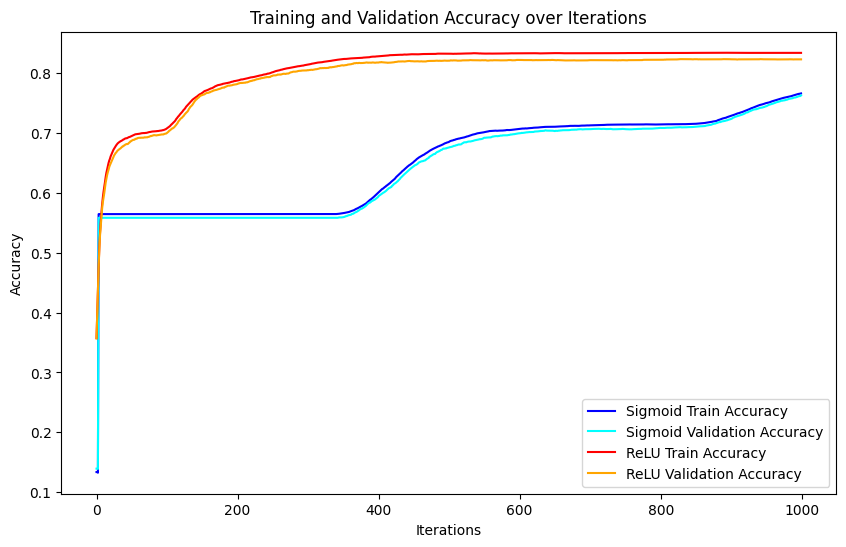

In [23]:
# Combined plot for accuracy
plt.figure(figsize=(10,6))
plt.plot(sigmoid_acc_stats['train_acc'], label='Sigmoid Train Accuracy', color='blue')
plt.plot(sigmoid_acc_stats['val_acc'], label='Sigmoid Validation Accuracy', color='cyan')
plt.plot(relu_acc_stats['train_acc'], label='ReLU Train Accuracy', color='red')
plt.plot(relu_acc_stats['val_acc'], label='ReLU Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy over Iterations')
plt.xlabel('Iterations')    
plt.ylabel('Accuracy')
plt.legend()
plt.show()

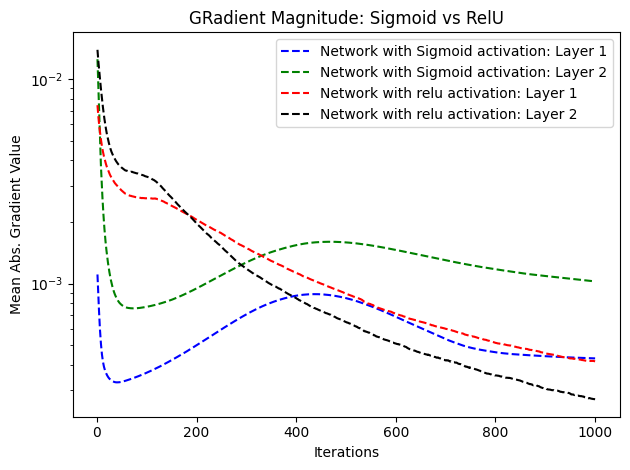

In [24]:

iterations = range(1, len(sigmoid_hl_grads['L1']) + 1)
plt.Figure(figsize=(12,6))

plt.plot(iterations, sigmoid_hl_grads['L1'], label='Network with Sigmoid activation: Layer 1', color='blue', linestyle='--')
plt.plot(iterations, sigmoid_hl_grads['L2'], label='Network with Sigmoid activation: Layer 2', color='green', linestyle='--')

plt.plot(iterations, relu_hl_grads['L1'], label='Network with relu activation: Layer 1', color='red', linestyle='--')
plt.plot(iterations, relu_hl_grads['L2'], label='Network with relu activation: Layer 2', color='black', linestyle='--')

plt.yscale('log')
plt.title('GRadient Magnitude: Sigmoid vs RelU')
plt.xlabel('Iterations')
plt.ylabel('Mean Abs. Gradient Value')
plt.legend()
plt.tight_layout()
plt.show()



In [25]:
test_df = pd.read_csv('test.csv')

X_test_raw = test_df.drop(columns=['price_class'])
y_train_raw = test_df['price_class'].values.reshape(-1, 1)

X_test = feature_processing.transform(X_test_raw)
y_test = one_hot_encoder.fit_transform(y_train_raw)

test_acc_sigmoid = nn_with_sigmoid.evaluate(X_test.values, y_test)
test_acc_relu = nn_with_relu.evaluate(X_test.values, y_test)

print(f'NN with Sigmoid Test Accuracy: {test_acc_sigmoid:.4f}')
print(f'NN with Relu Test Accuracy: {test_acc_relu:.4f}')

NN with Sigmoid Test Accuracy: 0.4417
NN with Relu Test Accuracy: 0.3519


In [26]:
from tabulate import tabulate
import numpy as np

# 1. Evaluate on Test Data (ensure X_test and y_test are preprocessed)
test_acc_sigmoid = nn_with_sigmoid.evaluate(X_test.values, y_test)
test_acc_relu = nn_with_relu.evaluate(X_test.values, y_test)

# 2. Gradient Distribution Statistics
def get_grad_stats(grad_list):
    return {
        'mean': grad_list[-1],
        'std': np.std(grad_list),
        'status': "Robust" if grad_list[-1] > 1e-2 else "Vanishing"
    }

# Collecting Stats
s_l1 = get_grad_stats(sigmoid_hl_grads['L1'])
s_l2 = get_grad_stats(sigmoid_hl_grads['L2'])
r_l1 = get_grad_stats(relu_hl_grads['L1'])
r_l2 = get_grad_stats(relu_hl_grads['L2'])

# 3. Model Performance & Generalization Table
performance_table = [
    ["Sigmoid (Xavier Init)", 
     f"{sigmoid_acc_stats['train_acc'][-1]:.2%}", 
     f"{sigmoid_acc_stats['val_acc'][-1]:.2%}", 
     f"{test_acc_sigmoid:.2%}",
     f"{sigmoid_loss_stats['val_loss'][-1]:.4f}"],
    ["ReLU (He Init)", 
     f"{relu_acc_stats['train_acc'][-1]:.2%}", 
     f"{relu_acc_stats['val_acc'][-1]:.2%}", 
     f"{test_acc_relu:.2%}",
     f"{relu_loss_stats['val_loss'][-1]:.4f}"]
]

# 4. Numerical Stability Table
gradient_table = [
    ["Sigmoid L1", f"{s_l1['mean']:.2e}", f"{s_l1['std']:.2e}", s_l1['status']],
    ["Sigmoid L2", f"{s_l2['mean']:.2e}", f"{s_l2['std']:.2e}", "Moderate"],
    ["ReLU L1", f"{r_l1['mean']:.2e}", f"{r_l1['std']:.2e}", r_l1['status']],
    ["ReLU L2", f"{r_l2['mean']:.2e}", f"{r_l2['std']:.2e}", "Strong"]
]

print("\n" + "="*85)
print("CROSS-ARCHITECTURE PERFORMANCE & GENERALIZATION")
print("="*85)
print(tabulate(performance_table, 
               headers=["Activation", "Train Acc", "Val Acc", "Test Acc", "Final Loss"], 
               tablefmt="fancy_grid"))

print("\n" + "="*85)
print("BACKPROPAGATION ANALYSIS: GRADIENT MAGNITUDE & NUMERICAL STABILITY")
print("="*85)
print(tabulate(gradient_table, 
               headers=["Layer", "Final Mean |δ|", "Std Dev", "Signal Health"], 
               tablefmt="fancy_grid"))


CROSS-ARCHITECTURE PERFORMANCE & GENERALIZATION
╒═══════════════════════╤═════════════╤═══════════╤════════════╤══════════════╕
│ Activation            │ Train Acc   │ Val Acc   │ Test Acc   │   Final Loss │
╞═══════════════════════╪═════════════╪═══════════╪════════════╪══════════════╡
│ Sigmoid (Xavier Init) │ 76.61%      │ 76.28%    │ 44.17%     │       0.5831 │
├───────────────────────┼─────────────┼───────────┼────────────┼──────────────┤
│ ReLU (He Init)        │ 83.38%      │ 82.30%    │ 35.19%     │       0.3579 │
╘═══════════════════════╧═════════════╧═══════════╧════════════╧══════════════╛

BACKPROPAGATION ANALYSIS: GRADIENT MAGNITUDE & NUMERICAL STABILITY
╒════════════╤══════════════════╤═══════════╤═════════════════╕
│ Layer      │   Final Mean |δ| │   Std Dev │ Signal Health   │
╞════════════╪══════════════════╪═══════════╪═════════════════╡
│ Sigmoid L1 │         0.00043  │  0.000177 │ Vanishing       │
├────────────┼──────────────────┼───────────┼─────────────────┤
│ S

In [27]:

ranked_features, g, dir = nn_with_relu.compute_feature_importance(X_train, y_train, True)

feature_names = X_train.columns

for i in range(10):
    index = ranked_features[i]
    name = feature_names[index]
    score = g[index]
    
    nudge = "Increase" if dir[0, index] > 0 else "Decrease"
    print(f'{i+1}. Feature {name} (Score: {score:0.5f}, Action: {nudge})')

(33078, 4)
(33078, 4)
(33078, 20)
1. Feature ss_col_pipeline__amenity_score (Score: 2.77019, Action: Decrease)
2. Feature categorical_col_pipeline__missingindicator_room_type_False (Score: 1.28160, Action: Decrease)
3. Feature categorical_col_pipeline__room_type_Entire home/apt (Score: 0.81515, Action: Decrease)
4. Feature categorical_col_pipeline__room_type_Shared room (Score: 0.60416, Action: Decrease)
5. Feature ss_col_pipeline__missingindicator_amenity_score (Score: 0.56614, Action: Increase)
6. Feature ss_col_pipeline__missingindicator_availability_365 (Score: 0.53182, Action: Decrease)
7. Feature categorical_col_pipeline__neighbourhood_group_Bronx (Score: 0.52365, Action: Decrease)
8. Feature categorical_col_pipeline__missingindicator_neighbourhood_group_False (Score: 0.50169, Action: Decrease)
9. Feature categorical_col_pipeline__neighbourhood_group_Queens (Score: 0.46499, Action: Increase)
10. Feature categorical_col_pipeline__neighbourhood_group_Brooklyn (Score: 0.42134, Actio

In [ ]:
from pytorch_model import PytorchModel
import torch
pt_nn_with_sigmoid = PytorchModel(input_dimension=X_train.shape[1], 
                                  hidden_dimension=L1_NEURONS,
                                  output_dimension=4,
                                  activation_function=torch.sigmoid)


pt_nn_with_relu = PytorchModel(input_dimension=X_train.shape[1], 
                                  hidden_dimension=L1_NEURONS,
                                  output_dimension=4,
                                  activation_function=torch.relu)